In [46]:
import numpy as np
import  matplotlib.pyplot as plt

In [ ]:
np.random.seed(42) 

# jeu d'entrainement - Features
X = 2 * np.random.rand(100, 1)
# jeu d'entrainement - Target (y) = 4 + 3X + bruit
y = 4 + 3 * X + np.random.randn(100, 1)

# ajout du biais  (colonne de 1 pour l'interception)
X_b = np.c_[np.ones((100, 1)), X] 

learning_rate=0.7 → theta final: [4.01239475 2.94908771]
learning_rate=0.7 → theta final: [4.21509612 2.77011342]
learning_rate=0.7 → theta final: [4.21509616 2.77011339]
learning_rate=0.7 → theta final: [-867421.35586877 -982419.61988848]
learning_rate=0.7 → theta final: [-8.15454551e+55 -9.23561439e+55]


(0.0, 2.0, 3.0, 11.0)

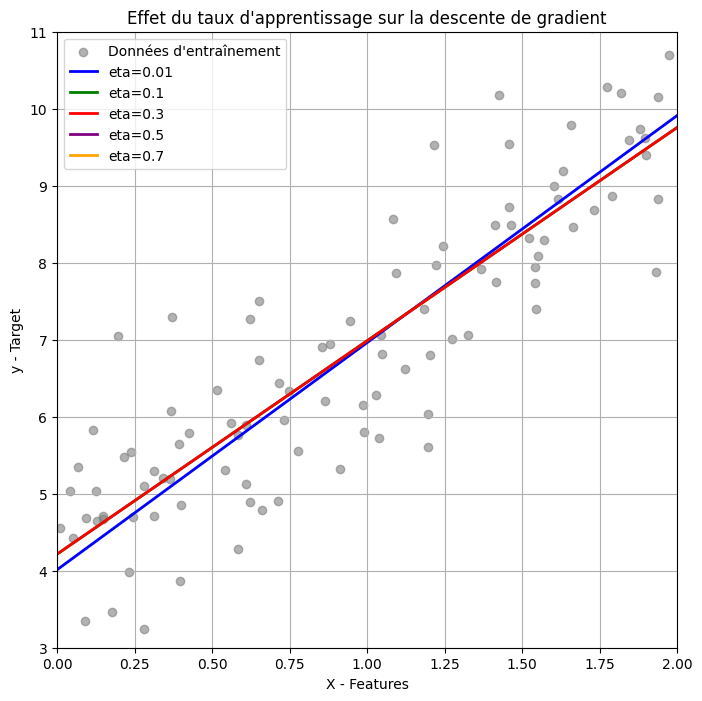

In [ ]:

# Paramètres du gradient descent

# Liste des taux d'apprentissage à tester et couleurs associées
learning_rate_list = [0.01, 0.1, 0.3, 0.5, 0.7]
colors = ["blue", "green", "red", "purple", "orange"]

# Initialisation du graphique
plt.figure(figsize=(8, 8))

# Affichage des points du jeu d'entraînement
plt.scatter(X, y, color="gray", alpha=0.6, label="Données d'entraînement")


# Tracer plusieurs droites pour différents taux d'apprentissage
X_new = np.array([[0], [2]])  # Deux points pour tracer les droites
X_new_b = np.c_[np.ones((2, 1)), X_new]  # Ajout du biais

for learning_rate, color in zip(learning_rate_list, colors):

    n_iterations = 500 if learning_rate <= 0.1 else 200  # Moins d'itérations pour grands eta
    # Nombre d'exemples d'entraînement
    m = len(X_b)

    # Initialisation de learning_rate (paramètres du modèle)
    # vecteur colonne (2,1)
    theta = np.random.randn(2,1)

    # Descente de gradient
    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T @ (X_b @ theta - y)
        theta = theta - learning_rate * gradients

    # Vérification des valeurs de theta
    print(f"learning_rate={eta} → theta final: {theta.ravel()}")


    # Prédictions avec le modèle appris
    y_pred = X_new_b @ theta

    # Tracer la droite de régression
    plt.plot(X_new, y_pred, color=color, linewidth=2, label=f"eta={learning_rate}")
# 
# Mise en forme du graphique
plt.xlabel("X - Features")
plt.ylabel("y - Target")
plt.title("Effet du taux d'apprentissage sur la descente de gradient")
plt.legend()
plt.grid(True)
plt.axis([0, 2, 3, 11])


Vecteur de gradients $\boxed{
\nabla_\theta MSE =  \dfrac{2}{m} X^T (X\theta - y)}
$


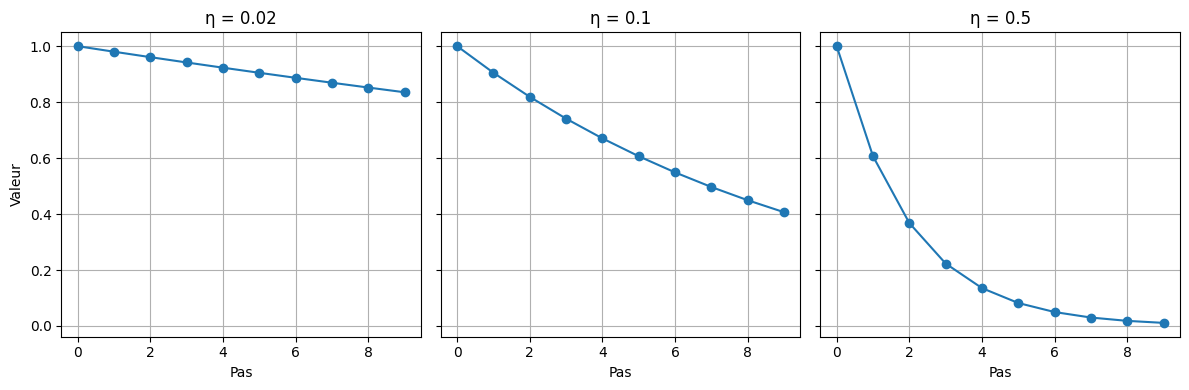

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres
etas = [0.02, 0.1, 0.5]  # Valeurs de eta
steps = np.arange(10)  # 10 premiers pas
initial_value = 1  # Valeur initiale arbitraire

# Générer des valeurs simulant une descente de gradient
def learning_curve(eta):
    return initial_value * np.exp(-eta * steps)

# Création des sous-graphiques
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

for ax, eta in zip(axes, etas):
    ax.plot(steps, learning_curve(eta), marker='o', linestyle='-')
    ax.set_title(f"η = {eta}")
    ax.set_xlabel("Pas")
    ax.grid()

axes[0].set_ylabel("Valeur")

plt.tight_layout()
plt.show()


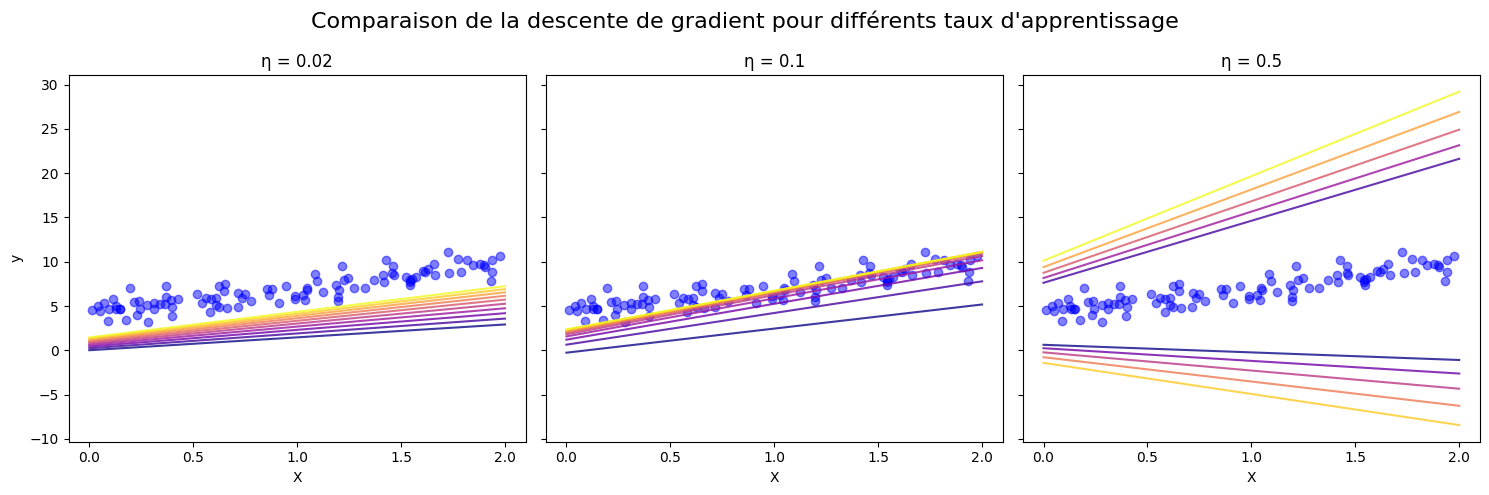

In [ ]:
# Génération du jeu de données
np.random.seed(42)
m = 100  # Nombre d'observations
X = 2 * np.random.rand(m, 1)  # Features
y = 4 + 3 * X + np.random.randn(m, 1)  # Target _ Relation linéaire avec bruit

# Ajout de la colonne de biais (X_b contient X et une colonne de 1)
X_b = np.c_[np.ones((m, 1)), X]

# Descente de gradient
def gradient_descent(X_b, y, eta, n_iterations=10):
    theta = np.random.randn(2, 1)  # Initialisation aléatoire
    history = [theta.copy()]  # Stocke les valeurs de theta
    
    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        history.append(theta.copy())  # Sauvegarde de l'évolution

    return history

# Paramètres d'apprentissage
etas = [0.02, 0.1, 0.5]  # Différents taux d'apprentissage
n_iterations = 10  # Nombre de mises à jour

# Création des sous-graphiques
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

X_range = np.array([[0], [2]])  # Intervalle pour afficher les lignes de régression

# Créer une palette de couleurs (du vert au rouge)
colors = plt.cm.plasma(np.linspace(0, 1, n_iterations))


for ax, eta in zip(axes, etas):
    history = gradient_descent(X_b, y, eta, n_iterations)

    # Affichage du jeu d'entrainement en nuage de points
    ax.scatter(X, y, color='blue', alpha=0.5, label="Données")

    

    # Tracer les 10 premières droites ajustées
    # for theta in history:
    #     y_pred = theta[0] + theta[1] * X_range
    #     ax.plot(X_range, y_pred, linestyle='-', alpha=0.4, color='red')


    # Tracer les 10 premières droites ajustées avec les couleurs variant du vert au rouge
    for i, theta in enumerate(history):
        if i < len(colors):  # S'assurer que l'index i ne dépasse pas la longueur de colors
            y_pred = theta[0] + theta[1] * X_range
            # Choisir la couleur basée sur l'itération
            ax.plot(X_range, y_pred, linestyle='-', color=colors[i], alpha=0.8)


    ax.set_title(f"η = {eta}")
    ax.set_xlabel("X")
    # ax.grid()
    ax.set_xticks(np.arange(0, 2.1, 0.5))  # graduations de 0 à 2 avec un pas de 0.5


axes[0].set_ylabel("y")
fig.suptitle("Comparaison de la descente de gradient pour différents taux d'apprentissage", fontsize=16)  # Titre global
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Ajuste la position du titre global pour qu'il ne chevauche pas les sous-graphiques

plt.show()


IndexError: index 10 is out of bounds for axis 0 with size 10

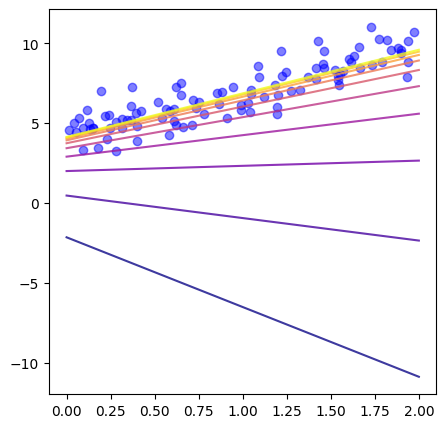

In [10]:
# Continue la descente de gradient pour 10 itérations supplémentaires
def continue_gradient_descent(X_b, y, eta, n_iterations=10, initial_theta=None):
    if initial_theta is None:
        initial_theta = np.random.randn(2, 1)  # Initialisation aléatoire si aucune valeur de theta donnée
    
    theta = initial_theta
    history = [theta.copy()]  # Stocke les valeurs de theta
    
    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        history.append(theta.copy())  # Sauvegarde de l'évolution

    return history

# Nouveau taux d'apprentissage (peut être modifié si nécessaire)
eta = 0.1
n_iterations = 10  # Nombre d'itérations supplémentaires

# Continue la descente de gradient après les 10 premières itérations
history_additional = continue_gradient_descent(X_b, y, eta, n_iterations, initial_theta=history[-1])

# Création de nouveaux sous-graphiques pour afficher les 10 itérations suivantes
fig, ax = plt.subplots(figsize=(5, 5))

# Affichage du jeu d'entrainement en nuage de points
ax.scatter(X, y, color='blue', alpha=0.5, label="Données")

# Créer une palette de couleurs
colors = plt.cm.plasma(np.linspace(0, 1, n_iterations))

# Tracer les 10 prochaines droites ajustées avec des couleurs variant
for i, theta in enumerate(history_additional):
    y_pred = theta[0] + theta[1] * X_range
    # Choisir la couleur basée sur l'itération
    ax.plot(X_range, y_pred, linestyle='-', color=colors[i], alpha=0.8)

ax.set_title(f"Continuer la descente de gradient après {n_iterations} itérations supplémentaires")
ax.set_xlabel("X")
ax.set_ylabel("y")
ax.set_xticks(np.arange(0, 2.1, 0.5))  # graduations de 0 à 2 avec un pas de 0.5
plt.tight_layout()
plt.show()


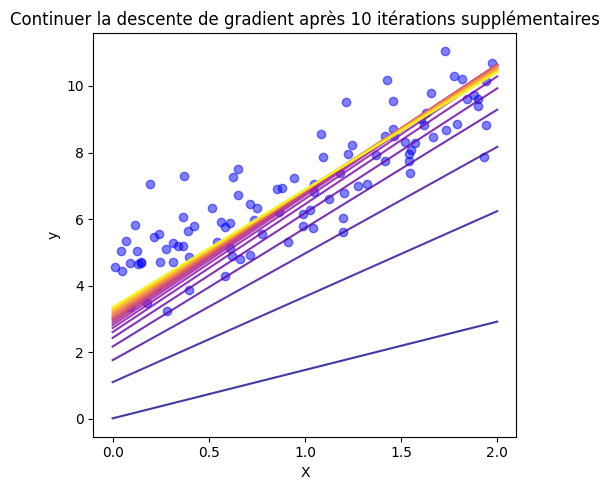

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Génération du jeu de données
np.random.seed(42)
m = 100  # Nombre d'observations
X = 2 * np.random.rand(m, 1)  # Features
y = 4 + 3 * X + np.random.randn(m, 1)  # Target _ Relation linéaire avec bruit

# Ajout de la colonne de biais (X_b contient X et une colonne de 1)
X_b = np.c_[np.ones((m, 1)), X]

# Descente de gradient
def gradient_descent(X_b, y, eta, n_iterations=10):
    theta = np.random.randn(2, 1)  # Initialisation aléatoire
    history = [theta.copy()]  # Stocke les valeurs de theta
    
    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        history.append(theta.copy())  # Sauvegarde de l'évolution

    return history

# Continue la descente de gradient pour 10 itérations supplémentaires
def continue_gradient_descent(X_b, y, eta, n_iterations=10, initial_theta=None):
    if initial_theta is None:
        initial_theta = np.random.randn(2, 1)  # Initialisation aléatoire si aucune valeur de theta donnée
    
    theta = initial_theta
    history = [theta.copy()]  # Stocke les valeurs de theta
    
    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        history.append(theta.copy())  # Sauvegarde de l'évolution

    return history

# Paramètres d'apprentissage
eta = 0.1
n_iterations = 10  # Nombre d'itérations supplémentaires

# Premières itérations
history = gradient_descent(X_b, y, eta, n_iterations)

# Continue la descente de gradient après les 10 premières itérations
history_additional = continue_gradient_descent(X_b, y, eta, n_iterations, initial_theta=history[-1])

# Création de nouveaux sous-graphiques pour afficher les 10 itérations suivantes
fig, ax = plt.subplots(figsize=(5, 5))

# Affichage du jeu d'entrainement en nuage de points
ax.scatter(X, y, color='blue', alpha=0.5, label="Données")

# Créer une palette de couleurs pour toutes les itérations (10 + 10)
colors = plt.cm.plasma(np.linspace(0, 1, len(history) + len(history_additional)))

# Tracer les 10 premières droites ajustées et les 10 suivantes avec des couleurs variant
for i, theta in enumerate(history + history_additional):
    y_pred = theta[0] + theta[1] * X_range
    # Choisir la couleur basée sur l'itération
    ax.plot(X_range, y_pred, linestyle='-', color=colors[i], alpha=0.8)

ax.set_title(f"Continuer la descente de gradient après {n_iterations} itérations supplémentaires")
ax.set_xlabel("X")
ax.set_ylabel("y")
ax.set_xticks(np.arange(0, 2.1, 0.5))  # graduations de 0 à 2 avec un pas de 0.5
plt.tight_layout()
plt.show()
